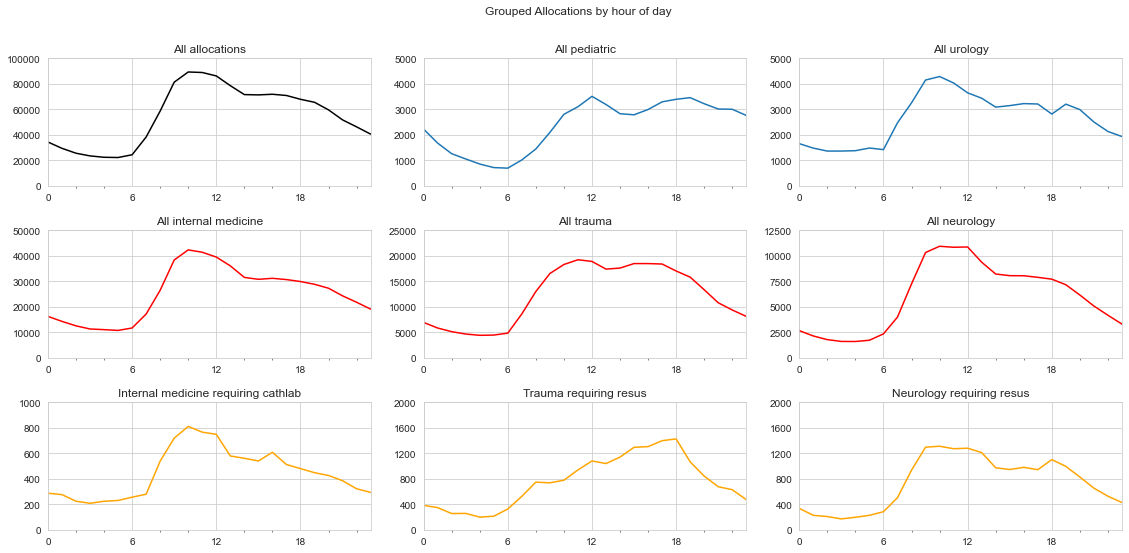

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/dgina23_usage_by_times.csv')
df_transposed = df.set_index('hour').transpose()

fig, axes = plt.subplots(3, 3, figsize = (16,8))

fig.suptitle('Grouped Allocations by hour of day')
fig.tight_layout(pad=2.5)

for axi in axes.flat:
    axi.set_xlim(0, 23)
    axi.xaxis.set_major_locator(plt.MultipleLocator(6))
    axi.xaxis.set_minor_locator(plt.MultipleLocator(2))
    axi.yaxis.set_major_locator(plt.MaxNLocator(5))
    axi.tick_params(axis='x', which='minor', bottom=True)

df_transposed['total'].plot(ax=axes[0,0], color="black", title="All allocations", ylim=[0,100000])
df_transposed['int'].plot(ax=axes[1,0], color="red", title="All internal medicine", ylim=[0,50000])
df_transposed['int_cathlab'].plot(ax=axes[2,0], color="orange", title="Internal medicine requiring cathlab", ylim=[0,1000])
df_transposed['trauma'].plot(ax=axes[1,1], color="red", title="All trauma", ylim=[0,25000])
df_transposed['trauma_resus'].plot(ax=axes[2,1], color="orange", title="Trauma requiring resus", ylim=[0,2000])
df_transposed['neuro'].plot(ax=axes[1,2], color="red", title="All neurology", ylim=[0,12500])
df_transposed['neuro_resus'].plot(ax=axes[2,2], color="orange", title="Neurology requiring resus", ylim=[0,2000])
df_transposed['peds'].plot(ax=axes[0,1], title="All pediatric", ylim=[0,5000])
df_transposed['urology'].plot(ax=axes[0,2], title="All urology", ylim=[0,5000])

plt.show();

In [15]:
def style_negative(v, props=''):
    return props if v < 0 else None

def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')

df_transposed['int_pct'] = df_transposed['int'] / df_transposed['total'] * 100
df_transposed['int_cathlab_pct'] = df_transposed['int_cathlab'] / df_transposed['int'] * 100
df_transposed['neuro_resus_pct'] = df_transposed['neuro_resus'] / df_transposed['neuro'] * 100
df_transposed['neuro_pct'] = df_transposed['neuro'] / df_transposed['total'] * 100
df_transposed['trauma_resus_pct'] = df_transposed['trauma_resus'] / df_transposed['trauma'] * 100
df_transposed['trauma_pct'] = df_transposed['trauma'] / df_transposed['total'] * 100
df_transposed['peds_pct'] = df_transposed['peds'] / df_transposed['total'] * 100
df_transposed['urology_pct'] = df_transposed['urology'] / df_transposed['total'] * 100

df1 = df_transposed.transpose().sort_index()

t1 = df1.style \
    .highlight_null(null_color="lightgrey") \
    .format(precision=2, thousands="", decimal=",") \
    .applymap(style_negative, props='color:red;') \
    .applymap(lambda v: 'opacity: 20%;' if (v < 50) and (v > -50) else None)

t1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
hour,,,,,,,,,,,,,,,,,,,,,,,,
int,"16251,00","14286,00","12538,00","11309,00","11049,00","10745,00","11704,00","17172,00","26507,00","38376,00","42331,00","41402,00","39512,00","36061,00","31541,00","30792,00","31179,00","30690,00","29917,00","28842,00","27290,00","24307,00","21790,00","19107,00"
int_cathlab,"287,00","276,00","224,00","208,00","224,00","230,00","256,00","279,00","539,00","719,00","811,00","766,00","749,00","579,00","561,00","540,00","608,00","512,00","480,00","448,00","426,00","385,00","322,00","293,00"
int_cathlab_pct,"1,77","1,93","1,79","1,84","2,03","2,14","2,19","1,62","2,03","1,87","1,92","1,85","1,90","1,61","1,78","1,75","1,95","1,67","1,60","1,55","1,56","1,58","1,48","1,53"
int_pct,"47,29","48,57","49,00","48,18","49,33","48,37","48,03","44,83","45,16","47,20","47,40","46,57","45,84","45,90","44,07","43,17","43,41","43,31","44,07","44,01","45,81","46,99","47,11","47,10"
neuro,"2662,00","2141,00","1781,00","1606,00","1600,00","1723,00","2347,00","3994,00","7242,00","10326,00","10938,00","10839,00","10869,00","9376,00","8216,00","8055,00","8046,00","7892,00","7713,00","7166,00","6157,00","5081,00","4175,00","3306,00"
neuro_pct,"7,75","7,28","6,96","6,84","7,14","7,76","9,63","10,43","12,34","12,70","12,25","12,19","12,61","11,93","11,48","11,29","11,20","11,14","11,36","10,93","10,33","9,82","9,03","8,15"
neuro_resus,"336,00","227,00","208,00","171,00","197,00","227,00","284,00","504,00","935,00","1296,00","1311,00","1272,00","1280,00","1212,00","973,00","946,00","980,00","943,00","1101,00","995,00","828,00","654,00","527,00","428,00"
neuro_resus_pct,"12,62","10,60","11,68","10,65","12,31","13,17","12,10","12,62","12,91","12,55","11,99","11,74","11,78","12,93","11,84","11,74","12,18","11,95","14,27","13,89","13,45","12,87","12,62","12,95"
peds,"2225,00","1676,00","1260,00","1054,00","855,00","716,00","693,00","1015,00","1445,00","2095,00","2805,00","3102,00","3510,00","3190,00","2828,00","2786,00","2994,00","3293,00","3394,00","3458,00","3220,00","3013,00","3003,00","2760,00"
